##Utsav Jitendrabhai Patel


In [113]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [114]:
#Importing google drive path
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
#Importing csv file
path = "/content/drive/MyDrive/Assign07/titanic_train.csv"
df = pd.read_csv(path)

In [116]:
#Showing 5 first raw of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
#Checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [118]:
#Droppping the Name, Ticket and Cabin
df.drop(['Name', 'Ticket','Cabin'], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [119]:
# Defining a dictionary for the mapping
sex_map = {'female': 0, 'male': 1}
embarked_map = {'C': 0, 'Q': 1, 'S': 2}

# Using the replace method to map the values
df['Sex'] = df['Sex'].replace(sex_map)
df['Embarked'] = df['Embarked'].replace(embarked_map)

In [120]:
#Showing the changed data of first 5 raw
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2.0
1,2,1,1,0,38.0,1,0,71.2833,0.0
2,3,1,3,0,26.0,0,0,7.9250,2.0
3,4,1,1,0,35.0,1,0,53.1000,2.0
4,5,0,3,1,35.0,0,0,8.0500,2.0


In [121]:
#Replacing value NAN to 0
df.fillna(value=0, inplace=True)
print(df)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1  22.0      1      0   7.2500       2.0
1              2         1       1    0  38.0      1      0  71.2833       0.0
2              3         1       3    0  26.0      0      0   7.9250       2.0
3              4         1       1    0  35.0      1      0  53.1000       2.0
4              5         0       3    1  35.0      0      0   8.0500       2.0
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       2    1  27.0      0      0  13.0000       2.0
887          888         1       1    0  19.0      0      0  30.0000       2.0
888          889         0       3    0   0.0      1      2  23.4500       2.0
889          890         1       1    1  26.0      0      0  30.0000       0.0
890          891         0       3    1  32.0      0      0   7.7500       1.0

[891 rows x 9 columns]


In [122]:
#Checking the null value after cleaning
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [123]:
#Training and testing the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(df.drop("Survived", axis=1), df["Survived"], test_size=0.2, random_state=42)


## Finding Optimal Value of K

In [124]:
Error_Rate = []

for i in range(1,30):
    
    knn_opt = KNeighborsClassifier(n_neighbors = i)
    knn_opt.fit(X_train,y_train)
    y_pred_opt = knn_opt.predict(X_test)
    Accuracy = np.mean(y_pred_opt == y_test)
    error_rate_value = 1 - Accuracy
    Error_Rate.append(error_rate_value)

Text(0, 0.5, 'Error Rate')

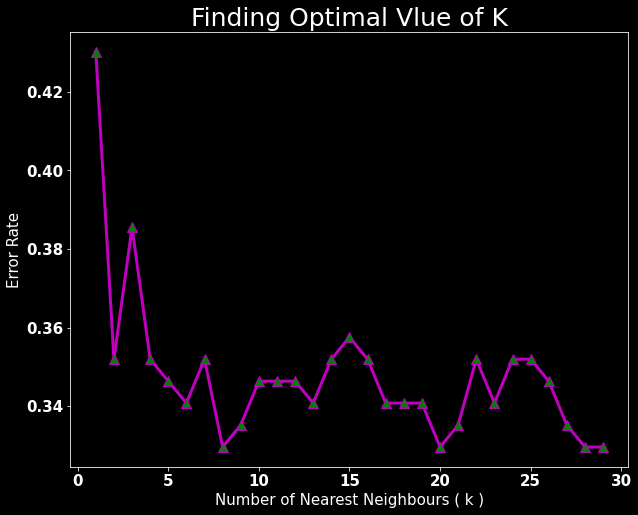

In [125]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 30), Error_Rate, 'm', lw = 3,  marker ='^', markerfacecolor ='g', markersize = 10)
plt.title('Finding Optimal Vlue of K', fontsize = 25)
plt.xlabel('Number of Nearest Neighbours ( k )', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

In [126]:
#Training the KNN classifier with k=8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn.predict(X_test)


In [127]:
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[98  7]
 [52 22]]


In [128]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

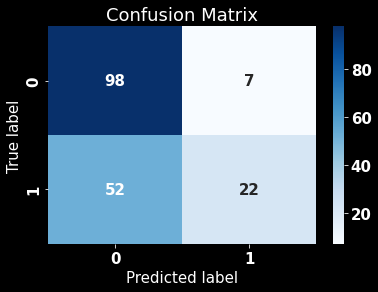

In [129]:
#Confusion matrix diagram
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels and title to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [130]:
#Creating Metrics variable for Accuracy, Precision, Recall and F1-score
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})

In [131]:
#Displaying Accuracy, Precision, Recall and F1-score
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.670391,0.705977,0.615315,0.597906
